# 데이터 탐색 및 불러오기

In [69]:
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("zippyz/cats-and-dogs-breeds-classification-oxford-dataset")

#print("Path to dataset files:", path)

# 필요한 공통 utility 함수 정의

In [70]:
import os
import sys

from google.colab import drive
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# drive mount in google os.getcwm()
drive.mount('/content/drive',force_remount=True)
os.listdir("/content/drive/MyDrive/mission07")
path = "/content/drive/MyDrive/mission07"


Mounted at /content/drive


In [71]:
!pip install gtts
from gtts import gTTS
from IPython.display import Audio, display
import requests
import json
import time


def speak_tts(text_to_speak, language='ko'):
    # param language: 사용할 언어 코드 (기본값: 'ko' 한국어). 예: 'en' (영어), 'ja' (일본어)

    output_filename = 'colab_tts_modified_temp.mp3'
    #print(f"🎤 TTS 시작: [출력 언어: {language.upper()}] - 텍스트 내용: '{text_to_speak[:20]}...'")

    try:
        tts = gTTS(text=text_to_speak, lang=language, slow=False)
        tts.save(output_filename)
        audio_player = Audio(output_filename, autoplay=True)
        display(audio_player)
    except Exception as e:
        print(f"❌ TTS 처리 중 오류 발생: {e}")

# ⚠️ 여기에 발급받은 실제 Discord 웹훅 URL로 대체해야 합니다!
DISCORD_WEBHOOK_URL = "https://discord.com/api/webhooks/1438483725644988509/9d9zXC7KYtvcJqEhz67MTb_hVMrztFmrBjnbwuj7zdTYKNlMKKzzCbJnJoPXuX7Unc1L"


def send_discord_simple_string(message_content):
    webhook_url = DISCORD_WEBHOOK_URL

    # 최종 payload (전송 데이터) 구성
    payload = {
        "username": "HyoKim DL Task Notifier 🤖", # 봇 이름 설정
        "content": message_content       # 인자로 받은 문자열을 전송
    }

    # 2. HTTP POST 요청 전송
    try:
        response = requests.post(
            webhook_url,
            data=json.dumps(payload),
            headers={'Content-Type': 'application/json'}
        )

        if response.status_code == 204:
            print("\n✅ Discord 문자열 알림 전송 성공!")
        else:
            print(f"\n❌ Discord 문자열 알림 전송 실패. 상태 코드: {response.status_code}")
            print(f"응답 내용: {response.text}")

    except Exception as e:
        print(f"\n❌ Discord 알림 전송 중 오류 발생: {e}")



In [72]:
import torch

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [132]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# 파일 경로 설정
trainval_file_path = os.path.join(path, "annotations", "annotations", "trainval.txt")
test_file_path = os.path.join(path, "annotations", "annotations", "test.txt")

# 이미지, Annotation 경로 설정
image_dir = os.path.join(path, "images", "images")
xml_dir = os.path.join(path, "annotations", "annotations", "xmls")

# Train/Validation 파일 읽기
df_trainval = pd.read_csv(trainval_file_path, sep=r"\s+", header=None)
df_trainval.columns = ["Image", "ClassID", "Species", "BreedID"]

# Test 파일 읽기
df_test = pd.read_csv(test_file_path, sep=r"\s+", header=None)
df_test.columns = ["Image", "ClassID", "Species", "BreedID"]

# 데이터 크기 확인
print(f"Train/Validation 데이터 수: {len(df_trainval)}")
print(f"Test 데이터 수: {len(df_test)}")

# Annotation 개수 확인
xml_files = [file for file in os.listdir(xml_dir) if file.endswith(".xml")]
print(f"XML 파일 개수: {len(xml_files)}")

Train/Validation 데이터 수: 3680
Test 데이터 수: 3669
XML 파일 개수: 3686


In [133]:
print(df_trainval.shape)
df_trainval.head()

(3680, 4)


,Image,ClassID,Species,BreedID
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [134]:
print(df_test.shape)
df_test.head()

(3669, 4)


,Image,ClassID,Species,BreedID
0,Abyssinian_201,1,1,1
1,Abyssinian_202,1,1,1
2,Abyssinian_204,1,1,1
3,Abyssinian_205,1,1,1
4,Abyssinian_206,1,1,1


In [135]:
df_trainval['Species'].value_counts()

,count
Species,
2,2492
1,1188


In [136]:
df_test['Species'].value_counts()

,count
Species,
2,2486
1,1183


In [137]:
# Train과 Validation에 사용될 이미지 파일 이름 리스트 생성
trainval_list = df_trainval['Image'].tolist()
print(trainval_list)
# Test에 사용될 이미지 파일 이름 리스트 생성
test_list = df_test['Image'].tolist()
print(test_list)

['Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102', 'Abyssinian_103', 'Abyssinian_104', 'Abyssinian_105', 'Abyssinian_106', 'Abyssinian_107', 'Abyssinian_108', 'Abyssinian_109', 'Abyssinian_10', 'Abyssinian_110', 'Abyssinian_111', 'Abyssinian_112', 'Abyssinian_113', 'Abyssinian_114', 'Abyssinian_115', 'Abyssinian_116', 'Abyssinian_117', 'Abyssinian_118', 'Abyssinian_119', 'Abyssinian_11', 'Abyssinian_120', 'Abyssinian_121', 'Abyssinian_122', 'Abyssinian_123', 'Abyssinian_124', 'Abyssinian_125', 'Abyssinian_126', 'Abyssinian_127', 'Abyssinian_128', 'Abyssinian_129', 'Abyssinian_12', 'Abyssinian_130', 'Abyssinian_131', 'Abyssinian_132', 'Abyssinian_133', 'Abyssinian_134', 'Abyssinian_135', 'Abyssinian_136', 'Abyssinian_137', 'Abyssinian_138', 'Abyssinian_139', 'Abyssinian_13', 'Abyssinian_140', 'Abyssinian_141', 'Abyssinian_142', 'Abyssinian_143', 'Abyssinian_144', 'Abyssinian_145', 'american_bulldog_100', 'american_bulldog_101', 'american_bulldog_102', 'american_bulldog_103', 'americ

In [139]:
# Train 데이터에서 예제 이미지 불러오기
train_example_image_name = df_trainval["Image"].iloc[0]
train_image_path = os.path.join(image_dir, f"{train_example_image_name}.jpg")

# 이미지 읽기
train_image = cv2.imread(train_image_path)
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

# Train 이미지 출력
plt.imshow(train_image)
plt.title(f"Train Image: {train_example_image_name}")
plt.axis("off")
plt.show()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [140]:
# Test 데이터에서 예제 이미지 불러오기
test_example_image_name = df_test["Image"].iloc[0]
test_image_path = os.path.join(image_dir, f"{test_example_image_name}.jpg")

# 이미지 읽기
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Test 이미지 출력
plt.imshow(test_image)
plt.title(f"Test Image: {test_example_image_name}")
plt.axis("off")
plt.show()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [81]:
# XML 파일 이름 가져오기 (확장자 제거)
xml_list = [os.path.splitext(file)[0] for file in os.listdir(xml_dir) if file.endswith(".xml")]

# Train 이미지에 대해 XML 파일이 없는 경우 확인
missing_xml = [image for image in trainval_list if image not in xml_list]

# Train 이미지에 대해 XML 파일이 있는 경우 확인
trainval_list = [image for image in trainval_list if image in xml_list]

# 결과 출력
print(f"XML 파일이 없는 Train 이미지 수: {len(missing_xml)}")
print(missing_xml)
print(f"XML 파일 Train 이미지 수: {len(xml_list)}")


XML 파일이 없는 Train 이미지 수: 9
['Abyssinian_104', 'Bengal_111', 'samoyed_10', 'Bengal_175', 'Egyptian_Mau_14', 'Egyptian_Mau_156', 'Egyptian_Mau_186', 'Ragdoll_199', 'saint_bernard_15']
XML 파일 Train 이미지 수: 3686


In [82]:
import xml.etree.ElementTree as ET

# 예제 XML 파일 경로
example_xml_file = os.path.join(xml_dir, xml_files[0])

# XML 파일 읽기 및 파싱
tree = ET.parse(example_xml_file)
root = tree.getroot()

# 재귀적으로 모든 태그와 데이터 출력 함수
def print_all_elements(element, indent=""):
    print(f"{indent}{element.tag}: {element.text}")
    for child in element:
        print_all_elements(child, indent + "  ")

# XML 구조 탐색
print_all_elements(root)

annotation: None
  folder: OXIIIT
  filename: english_cocker_spaniel_147.jpg
  source: None
    database: OXFORD-IIIT Pet Dataset
    annotation: OXIIIT
    image: flickr
  size: None
    width: 500
    height: 335
    depth: 3
  segmented: 0
  object: None
    name: dog
    pose: Frontal
    truncated: 0
    occluded: 0
    bndbox: None
      xmin: 224
      ymin: 85
      xmax: 375
      ymax: 272
    difficult: 0


In [83]:
# XML 파일에서 Bounding Box와 클래스 정보 추출
for obj in root.findall("object"):
    class_name = obj.find("name").text  # 클래스 이름
    bndbox = obj.find("bndbox")
    x_min = int(bndbox.find("xmin").text)
    y_min = int(bndbox.find("ymin").text)
    x_max = int(bndbox.find("xmax").text)
    y_max = int(bndbox.find("ymax").text)

    print(f"Class: {class_name}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

Class: dog, Bounding Box: (224, 85, 375, 272)


In [84]:
# 모든 XML 파일 처리
annotations = []


for xml_file in xml_files:
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    image_name = root.find("filename").text  # 이미지 파일 이름

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        bndbox = obj.find("bndbox")
        x_min = int(bndbox.find("xmin").text)
        y_min = int(bndbox.find("ymin").text)
        x_max = int(bndbox.find("xmax").text)
        y_max = int(bndbox.find("ymax").text)

        annotations.append({
            "image": image_name,
            "class": class_name,
            "bbox": [x_min, y_min, x_max, y_max]
        })
speak_tts("XML 파일 처리가 끝났습니다.", language='ja')

#  IoU 계산 함수 추가

In [85]:
import torch

def box_iou(boxes1: torch.Tensor, boxes2: torch.Tensor):
    """
    두 세트의 바운딩 박스 간의 IoU(Intersection over Union)를 계산합니다.
    boxes1: (N, 4) 텐서 (xmin, ymin, xmax, ymax)
    boxes2: (M, 4) 텐서 (xmin, ymin, xmax, ymax)
    반환: (N, M) 텐서 (N개의 box1과 M개의 box2 쌍의 IoU 값)
    """
    def box_area(box):
        # 바운딩 박스의 면적을 계산
        return (box[:, 2] - box[:, 0]) * (box[:, 3] - box[:, 1])

    area1 = box_area(boxes1)
    area2 = box_area(boxes2)

    # 교차 영역 (Intersection) 계산
    # 교차 영역의 x_min, y_min, x_max, y_max를 찾습니다.
    # (N, 1, 4)와 (1, M, 4) 형태로 확장하여 모든 쌍에 대해 계산
    lt = torch.max(boxes1[:, None, :2], boxes2[:, :2])  # left-top (x_min, y_min)
    rb = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])  # right-bottom (x_max, y_max)

    # 교차 영역의 너비와 높이 계산 (음수면 0으로 클램프)
    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]

    # 합집합 영역 (Union) 계산
    # Union = Area1 + Area2 - Intersection
    union = area1[:, None] + area2 - inter

    # IoU = Intersection / Union
    iou = inter / union
    return iou

# Object Detection 시각화

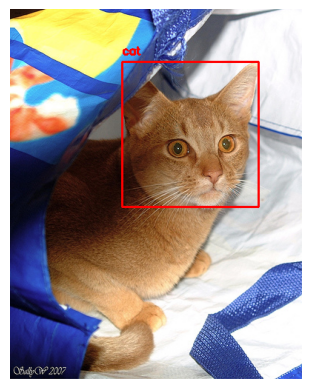

In [86]:
# Train 데이터에서 예제 이미지 불러오기
train_example_image_name = df_trainval["Image"].iloc[0]
train_image_path = os.path.join(image_dir, f"{train_example_image_name}.jpg")

# 이미지 읽기
image = cv2.imread(train_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 해당 이미지의 어노테이션 가져오기
annotations = [anno for anno in annotations if anno["image"] == f"{train_example_image_name}.jpg"]

# Bounding Box 그리기
for anno in annotations:
    x_min, y_min, x_max, y_max = anno["bbox"]
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # 빨간색 박스
    cv2.putText(image, anno["class"], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 시각화
plt.imshow(image)
plt.axis("off")
plt.show()

# YOLO 관련 전처리 함수

In [150]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
from tqdm import tqdm


# 현재 학습할 데이터셋 XML 파일이 있는 경로
VOC_ANNOTATION_DIR = "/content/drive/MyDrive/mission07/annotations/annotations/xmls"

# YOLO 형식 TXT 저장 경로
YOLO_LABEL_DIR = "/content/drive/MyDrive/mission07/images/labels/train"

# 이미지가 있는 경로 (XML의 filename을 찾기 위해 필요)
IMAGE_DIR = "/content/drive/MyDrive/mission07/images/images/train"

# 클래스 매핑
CLASSES = {
    'dog': 0,
    'cat': 1
}

# =========================================================================
# 📌 VOC → YOLO 변환 함수
# =========================================================================
def convert_to_yolo_format(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        img_filename = root.find('filename').text
    except Exception:
        print(f"⚠️ XML 파싱 실패 → {os.path.basename(xml_file_path)}")
        return None

    # 이미지 찾기
    img_path = os.path.join(IMAGE_DIR, img_filename)

    # jpg 확장자 강제 시도
    if not os.path.exists(img_path):
        alt_img_path = os.path.join(IMAGE_DIR, os.path.splitext(img_filename)[0] + '.jpg')
        if os.path.exists(alt_img_path):
            img_path = alt_img_path
        else:
            print(f"⚠️ 이미지 없음 → {img_filename} / 폴더: {IMAGE_DIR}")
            return None

    # 이미지 크기 로드
    try:
        img = Image.open(img_path)
        img_w, img_h = img.size
    except Exception:
        print(f"⚠️ 이미지 로드 실패 → {img_path}")
        return None

    yolo_lines = []
    object_count = 0

    # XML object 파싱
    for obj in root.findall('object'):
        object_count += 1
        class_name = obj.find('name').text

        # 클래스 이름 확인
        if class_name not in CLASSES:
            print(f"⚠️ 알 수 없는 클래스 '{class_name}' → XML: {os.path.basename(xml_file_path)}")
            continue

        class_id = CLASSES[class_name]

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # YOLO 좌표 변환
        x_center = (xmin + xmax) / (2.0 * img_w)
        y_center = (ymin + ymax) / (2.0 * img_h)
        width    = (xmax - xmin) / img_w
        height   = (ymax - ymin) / img_h

        yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
        yolo_lines.append(yolo_line)

    # 객체는 있는데 유효 클래스가 하나도 없는 경우
    if object_count > 0 and not yolo_lines:
        print(f"⚠️ {os.path.basename(xml_file_path)} → 객체 {object_count}개지만 유효 클래스 없음")

    return yolo_lines


# =========================================================================
# 📌 메인 실행 로직
# =========================================================================
os.makedirs(YOLO_LABEL_DIR, exist_ok=True)

xml_files = [f for f in os.listdir(VOC_ANNOTATION_DIR) if f.endswith('.xml')]

print(f"📁 XML 파일: {len(xml_files)}개 발견")
print(f"📂 YOLO TXT 저장 위치: {YOLO_LABEL_DIR}")

for xml_file in tqdm(xml_files, desc="XML → YOLO 변환중"):
    xml_path = os.path.join(VOC_ANNOTATION_DIR, xml_file)
    yolo_lines = convert_to_yolo_format(xml_path)

    if yolo_lines:
        txt_filename = xml_file.replace('.xml', '.txt')
        txt_path = os.path.join(YOLO_LABEL_DIR, txt_filename)

        with open(txt_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

print("✅ 변환 완료!")


📁 XML 파일: 3686개 발견
📂 YOLO TXT 저장 위치: /content/drive/MyDrive/mission07/images/labels/train


XML → YOLO 변환중: 100%|██████████| 3686/3686 [01:00<00:00, 60.83it/s]

✅ 변환 완료!


# Yaml 파일 생성  (YOLO 모델을 위해서, 전처리 이후에)

In [151]:
import yaml
import os

# =========================================================================
# 💡 사용자 설정: 경로 및 클래스 정의 (절대 경로 수정됨)
# =========================================================================

# 이미지 베이스 경로
BASE_IMAGE_DIR = "/content/drive/MyDrive/mission07/images/images"

# 학습 이미지 경로 (BASE_IMAGE_DIR 하위의 train 폴더 가정)
TRAIN_IMAGE_PATH = os.path.join(BASE_IMAGE_DIR, "train")
# 검증 이미지 경로 (BASE_IMAGE_DIR 하위의 val 폴더 가정)
VAL_IMAGE_PATH = os.path.join(BASE_IMAGE_DIR, "val")

# 클래스 이름
YOLO_CLASS_NAMES = ['dog', 'cat']
NUM_CLASSES = len(YOLO_CLASS_NAMES)

# YAML 파일 저장 경로
YAML_PATH = "/content/drive/MyDrive/mission07/annotations/annotations/yolo_data/pet_face_detection_data.yaml"

# =========================================================================
# 💡 YAML 내용 작성 및 저장
# =========================================================================

yaml_content = {
    # 학습 및 검증 이미지 폴더 경로 (절대 경로)
    'train': TRAIN_IMAGE_PATH,
    'val': VAL_IMAGE_PATH,

    # 클래스 개수
    'nc': NUM_CLASSES,

    # 클래스 이름 리스트
    'names': YOLO_CLASS_NAMES
}

# YAML 파일로 저장
with open(YAML_PATH, 'w') as f:
    yaml.safe_dump(yaml_content, f, sort_keys=False)

print(f"✅ YAML 파일 생성 완료! 경로: {YAML_PATH}")
print("\n--- YAML 파일 내용 ---")
print(yaml.safe_dump(yaml_content, sort_keys=False))
# =========================================================================
# 💡 최종 확인 및 다음 단계
# =========================================================================


✅ YAML 파일 생성 완료! 경로: /content/drive/MyDrive/mission07/annotations/annotations/yolo_data/pet_face_detection_data.yaml

--- YAML 파일 내용 ---
train: /content/drive/MyDrive/mission07/images/images/train
val: /content/drive/MyDrive/mission07/images/images/val
nc: 2
names:
- dog
- cat



# 데이터셋 준비

In [87]:
from torchvision.transforms import v2

transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

In [88]:
from PIL import Image
from torch.utils.data import Dataset

class VOCDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, classes, image_list, transforms=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.classes = classes
        self.transforms = transforms
        self.image_files = image_list # 미리 필터링된 유효한 이미지 파일 리스트

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # 이미지 및 XML 파일 경로 설정
        image_file = self.image_files[idx] + ".jpg"
        annotation_file = self.image_files[idx] + ".xml"
        image_path = os.path.join(self.image_dir, image_file)
        annotation_path = os.path.join(self.annotation_dir, annotation_file)

        # 이미지 로드
        image = Image.open(image_path).convert("RGB")

        # 어노테이션 로드
        boxes = []
        labels = []
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in self.classes:
                continue
            labels.append(self.classes.index(class_name))

            bndbox = obj.find("bndbox")
            x_min = int(bndbox.find("xmin").text)
            y_min = int(bndbox.find("ymin").text)
            x_max = int(bndbox.find("xmax").text)
            y_max = int(bndbox.find("ymax").text)
            boxes.append([x_min, y_min, x_max, y_max])

        # Tensor로 변환
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        # Transform 적용
        if self.transforms:
            image, boxes, labels = self.transforms(image, boxes, labels)

        target = {"boxes": boxes, "labels": labels}
        return image, target

In [89]:
class TestDataset(Dataset):
    def __init__(self, image_dir, image_list, transforms=None):
        self.image_dir = image_dir
        self.transforms = transforms
        self.image_files = image_list  # 테스트 이미지 리스트 (확장자 없음)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # 이미지 파일 경로
        image_file = self.image_files[idx] + ".jpg"
        image_path = os.path.join(self.image_dir, image_file)

        # 이미지 로드
        image = Image.open(image_path).convert("RGB")

        # Transform 적용
        if self.transforms:
            image = self.transforms(image)

        return image, self.image_files[idx]  # 이미지와 파일 이름 반환

In [90]:
from sklearn.model_selection import train_test_split

# Train/Validation 분리 (trainval_list에서 80% Train, 20% Validation으로 나눔)
train_list, valid_list = train_test_split(trainval_list, test_size=0.3, random_state=42)

# 결과 확인
print(f"Train 이미지 수: {len(train_list)}")
print(f"Validation 이미지 수: {len(valid_list)}")
print(f"Test 이미지 수: {len(test_list)}")

Train 이미지 수: 2569
Validation 이미지 수: 1102
Test 이미지 수: 3669


In [91]:
from torch.utils.data import DataLoader

# 클래스 정의
classes = ["background", "dog", "cat"]

# Train Dataset
train_dataset = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=train_list,  # Train 리스트 사용
    transforms=transform
)

# Validation Dataset
valid_dataset = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=valid_list,  # Validation 리스트 사용
    transforms=transform
)

# Test Dataset 생성
test_dataset = TestDataset(
    image_dir=image_dir,  # 테스트 이미지 디렉토리
    image_list=test_list,       # 테스트 이미지 리스트 (확장자 없는 이름)
    transforms=transform  # 필요하면 Transform 적용
)


# 데이터 로더 생성 batch 사이즈를 8에서 4로. OOM 때문에
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# 데이터 크기 출력
print(f"Train 데이터셋 크기: {len(train_dataset)}")
print(f"Validation 데이터셋 크기: {len(valid_dataset)}")
print(f"Test 데이터셋 크기: {len(test_dataset)}")


Train 데이터셋 크기: 2569
Validation 데이터셋 크기: 1102
Test 데이터셋 크기: 3669


# SSD 모델 준비

In [106]:
import torchvision
from torchvision.models.detection.ssd import SSD300_VGG16_Weights
# SSD 모델 불러오기
model = torchvision.models.detection.ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT).to(device)

# 클래스 개수에 맞게 출력 레이어 수정
num_classes = len(classes)  # background 포함
model.head.classification_head.num_classes = num_classes



# Faster R-CNN 모델 시도

In [110]:


# 변경 (Faster R-CNN, ResNet-50-FPN 백본 사용 권장):
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
)
#
num_classes = len(classes)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features, num_classes
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)



FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# YOLO 모델 준비

In [127]:
!pip install ultralytics

In [152]:
import torch
from ultralytics import YOLO # YOLO 모델 로드를 위해 ultralytics 라이브러리 사용

# 로드할 모델 파일 이름을 변수로 저장
MODEL_FILE_NAME = 'yolov8n.pt'

# device가 이미 정의되어 있다고 가정합니다.
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# =========================================================================
# 💡 YOLOv8 모델 불러오기 및 설정
# =========================================================================

# 1. 사전 학습된 YOLOv8 모델 로드
# 'yolov8n.pt' (nano) 외에 'yolov8s.pt' (small) 등을 사용할 수 있습니다.
model = YOLO('yolov8n.pt')

# 2. 모델을 device로 이동 (YOLO 객체는 to(device)를 지원합니다)
model.to(device)

# 3. 출력 문구를 수정하여 KeyError를 해결합니다.
# model.yaml 대신, 로드 시 사용한 파일 이름(MODEL_FILE_NAME)을 사용합니다.
print(f"✅ YOLOv8 모델 로드 완료. 학습에 사용할 모델: {MODEL_FILE_NAME}")

✅ YOLOv8 모델 로드 완료. 학습에 사용할 모델: yolov8n.pt


# YOLO 모델 학습 및 평가

In [154]:
import torch
from ultralytics import YOLO
import os

# =========================================================================
# 💡 사용자 설정 (SSD 코드의 변수를 대체합니다)
# =========================================================================

# GPU 사용 가능 여부 확인 및 장치 설정 (YOLOv8은 ID를 사용할 때 0, 1, ... 또는 'cpu'를 사용)
device = 0 if torch.cuda.is_available() else 'cpu'
print(f"사용 장치: {'GPU (ID: 0)' if device == 0 else 'CPU'}")

# 🚨 이전에 생성한 data.yaml 파일 이름
YAML_FILE_NAME = "/content/drive/MyDrive/mission07/annotations/annotations/yolo_data/pet_face_detection_data.yaml"

# SSD 코드의 num_epochs 변수를 그대로 사용
num_epochs = 5

# 학습 결과가 저장될 runs/detect/ 폴더의 이름
PROJECT_NAME = "yolov8_pet_face_run"

# =========================================================================
# 🛠️ YOLOv8 모델 로드 및 학습 실행 (단 한 줄로 SSD의 전체 루프를 대체)
# =========================================================================

# 1. 사전 학습된 YOLOv8 모델 로드
# 'yolov8n.pt' (nano) 모델을 사용합니다.
model = YOLO('yolov8n.pt')

print(f"\n[YOLOv8] 학습 시작 (Epochs: {num_epochs}, data: {YAML_FILE_NAME})")

# 2. model.train() 명령어 하나로 전체 학습 및 Validation 자동 수행
# - SSD의 for epoch in range와 for images, targets in train_loader 루프를 모두 대체합니다.
# - Validation, mAP 계산 및 체크포인트 저장을 자동으로 처리합니다.
results = model.train(
    data=YAML_FILE_NAME,
    epochs=num_epochs,
    imgsz=640,    # 이미지 크기 설정
    batch=8,      # 배치 크기 설정
    name=PROJECT_NAME,
    device=device
)

print(f"\n✅ YOLOv8 학습 완료! 총 {num_epochs} 에포크 실행.")

# =========================================================================
# 📊 최종 mAP 결과 확인 (선택 사항: 학습 결과 객체에서 직접 추출)
# =========================================================================

# YOLOv8은 학습 종료 후 results 객체에 최종 metric을 저장합니다.
final_map_50 = results.box.map50 # IoU 0.50 기준 AP
final_map = results.box.map     # IoU 0.5:0.95 기준 mAP

print("\n--- 최종 성능 지표 ---")
print(f" 최종 Train Loss, Val Loss, mAP는 runs/{PROJECT_NAME}/results.csv 파일에 저장됩니다.")
print(f" 최종 Validation AP @ IoU=0.50: {final_map_50:.4f}")
print(f" 최종 Validation mAP (0.5:0.95): {final_map:.4f}")
print("------------------------")

사용 장치: GPU (ID: 0)

[YOLOv8] 학습 시작 (Epochs: 5, data: /content/drive/MyDrive/mission07/annotations/annotations/yolo_data/pet_face_detection_data.yaml)
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/mission07/annotations/annotations/yolo_data/pet_face_detection_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=tra

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1299: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1301: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 42.2±31.3 MB/s, size: 120.1 KB)
train: Scanning /content/drive/MyDrive/mission07/images/labels/train... 3686 images, 3698 backgrounds, 6 corrupt: 100% ━━━━━━━━━━━━ 7390/7390 68.7it/s 1:48
train: /content/drive/MyDrive/mission07/images/images/train/Abyssinian_34.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'webp', 'dng', 'tiff', 'png', 'bmp', 'heic', 'jpg', 'mpo', 'pfm', 'jpeg', 'tif'}
videos: {'mov', 'mp4', 'ts', 'wmv', 'asf', 'm4v', 'avi', 'webm', 'mpeg', 'mpg', 'gif', 'mkv'}
train: /content/drive/MyDrive/mission07/images/images/train/Egyptian_Mau_138.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/mission07/images/images/train/Egyptian_Mau_139.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'webp', 'dng', 'tiff', 'png', 'bmp', 'heic', 'jpg', 'mpo', 'pfm', 'jpeg', 'tif'}
videos: {'mov', 'mp4', 'ts', 'wmv', 'asf', 'm4v', 'av

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


        1/5      1.82G      1.101      2.781      1.361         13        640: 100% ━━━━━━━━━━━━ 923/923 5.1it/s 3:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 6.3it/s 1:14
                   all       7384       3687      0.428      0.686      0.423      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/5      2.25G      1.386      2.286      1.467          9        640: 0% ──────────── 0/923  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


        2/5      2.25G      1.164      1.874      1.376         13        640: 100% ━━━━━━━━━━━━ 923/923 5.4it/s 2:50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 6.5it/s 1:11
                   all       7384       3687      0.372      0.688       0.41      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/5      2.25G     0.9764      1.485      1.281         12        640: 0% ──────────── 0/923  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


        3/5      2.25G      1.116       1.68      1.345          9        640: 100% ━━━━━━━━━━━━ 923/923 5.2it/s 2:57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 5.8it/s 1:20
                   all       7384       3687      0.445      0.803      0.475      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        4/5      2.25G      1.539      2.428      1.652          8        640: 0% ──────────── 1/923 2.5it/s 0.2s<6:03

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


        4/5      2.25G      1.013      1.495      1.275         11        640: 100% ━━━━━━━━━━━━ 923/923 5.5it/s 2:49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 6.5it/s 1:11
                   all       7384       3687      0.483      0.931      0.522      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        5/5      2.25G      1.465      1.704      1.619         12        640: 0% ──────────── 0/923  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


        5/5      2.25G     0.8911       1.37      1.198         13        640: 100% ━━━━━━━━━━━━ 923/923 5.5it/s 2:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 6.6it/s 1:10
                   all       7384       3687      0.486      0.939      0.522      0.437

5 epochs completed in 0.344 hours.
Optimizer stripped from /content/runs/detect/yolov8_pet_face_run8/weights/last.pt, 6.2MB
Optimizer stripped from /content/runs/detect/yolov8_pet_face_run8/weights/best.pt, 6.2MB

Validating /content/runs/detect/yolov8_pet_face_run8/weights/best.pt...
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 462/462 6.7it/s 1:09
                   all       7384       3687      0.486      0.938      0.522      0.

# 모델 학습 및 평가

In [111]:
import numpy as np
from sklearn.metrics import average_precision_score

def calculate_iou(box, boxes):
    """
    Calculate Intersection over Union (IoU) between a box and multiple boxes.

    Args:
        box (array): Single bounding box [x_min, y_min, x_max, y_max].
        boxes (array): Array of bounding boxes [[x_min, y_min, x_max, y_max], ...].

    Returns:
        array: IoU scores for each box in `boxes`.
    """
    x_min = np.maximum(box[0], boxes[:, 0])
    y_min = np.maximum(box[1], boxes[:, 1])
    x_max = np.minimum(box[2], boxes[:, 2])
    y_max = np.minimum(box[3], boxes[:, 3])

    intersection = np.maximum(0, x_max - x_min) * np.maximum(0, y_max - y_min)
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    boxes_area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    union = box_area + boxes_area - intersection

    iou = intersection / union
    return iou


def calculate_ap(predictions, ground_truths, class_idx, iou_threshold=0.5):
    """
    특정 클래스에 대한 AP 계산.
    predictions: 모델의 예측 리스트 [{"boxes": [[x_min, y_min, x_max, y_max]], "labels": [label]}]
    ground_truths: 정답 리스트 [{"boxes": [[x_min, y_min, x_max, y_max]], "labels": [label]}]
    class_idx: 평가 대상 클래스 인덱스
    iou_threshold: IoU 기준값 (default=0.5)

    Returns:
        Average Precision (AP) 값
    """
    true_positives = []
    false_positives = []
    all_ground_truths = 0

    # 모든 예측과 정답을 순회
    for pred, gt in zip(predictions, ground_truths):
        pred_boxes = np.array(pred["boxes"])
        pred_labels = np.array(pred["labels"])
        gt_boxes = np.array(gt["boxes"])
        gt_labels = np.array(gt["labels"])

        # 현재 클래스에 해당하는 박스만 필터링
        pred_boxes = pred_boxes[pred_labels == class_idx]
        gt_boxes = gt_boxes[gt_labels == class_idx]

        all_ground_truths += len(gt_boxes)

        # IoU 계산
        detected = []
        for pred_box in pred_boxes:
            ious = []
            for gt_box in gt_boxes:
                iou = calculate_iou(pred_box, gt_box)
                ious.append(iou)

            if len(ious) > 0:
                max_iou_idx = np.argmax(ious)
                if ious[max_iou_idx] >= iou_threshold and max_iou_idx not in detected:
                    true_positives.append(1)
                    false_positives.append(0)
                    detected.append(max_iou_idx)
                else:
                    true_positives.append(0)
                    false_positives.append(1)
            else:
                false_positives.append(1)

    # Precision-Recall Curve 계산
    tp_cumsum = np.cumsum(true_positives)
    fp_cumsum = np.cumsum(false_positives)
    precisions = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-6)
    recalls = tp_cumsum / (all_ground_truths + 1e-6)

    # AP 계산
    ap = 0.0
    for i in range(1, len(precisions)):
        ap += (recalls[i] - recalls[i - 1]) * precisions[i]

    return ap


def evaluate_model(predictions, ground_truths, classes):
    class_aps = []

    for class_idx, class_name in enumerate(classes[1:], start=1):
        true_positives = []
        scores = []
        num_ground_truths = 0

        for pred, gt in zip(predictions, ground_truths):
            # Filter for the current class
            pred_boxes = pred["boxes"][pred["labels"] == class_idx].cpu().numpy() if len(pred["boxes"]) > 0 else []
            pred_scores = pred["scores"][pred["labels"] == class_idx].cpu().numpy() if len(pred["scores"]) > 0 else []
            gt_boxes = gt["boxes"][gt["labels"] == class_idx].cpu().numpy() if len(gt["boxes"]) > 0 else []

            num_ground_truths += len(gt_boxes)

            if len(pred_boxes) == 0 or len(gt_boxes) == 0:
                continue  # Skip if no predictions or ground truths for this class

            matched = np.zeros(len(gt_boxes), dtype=bool)
            for box, score in zip(pred_boxes, pred_scores):
                ious = calculate_iou(box, gt_boxes)
                max_iou_idx = np.argmax(ious) if len(ious) > 0 else -1
                max_iou = ious[max_iou_idx] if max_iou_idx >= 0 else 0

                if max_iou >= 0.5 and not matched[max_iou_idx]:
                    true_positives.append(1)
                    matched[max_iou_idx] = True
                else:
                    true_positives.append(0)

                scores.append(score)

        if len(scores) == 0:
            class_aps.append(0)
            continue

        sorted_indices = np.argsort(-np.array(scores))
        true_positives = np.array(true_positives)[sorted_indices]
        scores = np.array(scores)[sorted_indices]

        cum_true_positives = np.cumsum(true_positives)
        precision = cum_true_positives / (np.arange(len(true_positives)) + 1)
        recall = cum_true_positives / num_ground_truths

        ap = average_precision_score(true_positives, scores) if len(scores) > 0 else 0
        class_aps.append(ap)

    mAP = np.mean(class_aps)
    return mAP

In [95]:
!pip install pycocotools
!pip install torchmetrics

In [112]:
import torch
from torchvision.transforms import functional as F

# Optimizer와 Loss 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [113]:
from tqdm import tqdm # 진행 상황 시각화
import torch
from torchmetrics.detection import MeanAveragePrecision

metric = MeanAveragePrecision(box_format='xyxy', iou_thresholds=[0.5, 0.75])

# Training + Validation Loop
num_epochs = 5
# 👇 학습 시작 전에 이 코드를 추가합니다. Out of Memory 해결 위해서, cashe 초기화.
if torch.cuda.is_available():
    torch.cuda.empty_cache()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs} 시작")

    # Training Phase
    model.train()
    total_train_loss = 0

    for images, targets in tqdm(train_loader, desc="Training"):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        total_train_loss += losses.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)

    # Validation Phase
    model.eval()

    # ⭐ TorchMetrics 업데이트
    with torch.no_grad():
        for images, targets in tqdm(val_loader, desc="Validation"):
            images = [img.to(device) for img in images]
            predictions = model(images)

            # TorchMetrics는 CPU 텐서를 요구하며, targets의 형식은 COCO와 유사해야 합니다.
            preds_cpu = [{k: v.cpu() for k, v in p.items()} for p in predictions]
            targets_cpu = [{k: v.cpu() for k, v in t.items()} for t in targets]

            # IoU 기반 지표 계산을 위해 예측 및 정답을 업데이트
            metric.update(preds_cpu, targets_cpu)

    # ⭐⭐ 성능 평가 및 IoU 기반 지표 출력 ⭐⭐
    mAP_results = metric.compute()

    # 결과 추출 (텐서에서 float 값으로 변환)
    mAP_all_iou = mAP_results['map'].item()      # IoU 0.5:0.95 기준 mAP
    mAP_iou_50 = mAP_results['map_50'].item()    # IoU 0.50 기준 AP

    # IoU 지표를 포함하여 하나의 print 구문으로 출력
    print(f"Epoch {epoch + 1}/{num_epochs}:\n"
        f"  - Train Loss: {avg_train_loss:.4f}\n"
        f"  - Val mAP (IoU 0.5:0.95): {mAP_all_iou:.4f}\n"
        f"  - AP @ IoU=0.50: {mAP_iou_50:.4f}\n")

    # 다음 에포크를 위해 Metric 상태 리셋 (필수)
    metric.reset()


text_to_speak = f"학습이 종료 되었습니다. Epochs는 {num_epochs}입니다"
speak_tts(text_to_speak, language='ja')
send_discord_simple_string(test_to_speak)


Epoch 1/5 시작


Validation: 100%|██████████| 276/276 [03:50<00:00,  1.20it/s]


Epoch 1/5:
  - Train Loss: 0.1480
  - Val mAP (IoU 0.5:0.95): 0.9145
  - AP @ IoU=0.50: 0.9745

Epoch 2/5 시작


Validation: 100%|██████████| 276/276 [02:59<00:00,  1.54it/s]


Epoch 2/5:
  - Train Loss: 0.0792
  - Val mAP (IoU 0.5:0.95): 0.9408
  - AP @ IoU=0.50: 0.9827

Epoch 3/5 시작


Validation: 100%|██████████| 276/276 [02:59<00:00,  1.54it/s]


Epoch 3/5:
  - Train Loss: 0.0636
  - Val mAP (IoU 0.5:0.95): 0.9414
  - AP @ IoU=0.50: 0.9780

Epoch 4/5 시작


Validation: 100%|██████████| 276/276 [02:59<00:00,  1.54it/s]


Epoch 4/5:
  - Train Loss: 0.0532
  - Val mAP (IoU 0.5:0.95): 0.9483
  - AP @ IoU=0.50: 0.9815

Epoch 5/5 시작


Validation: 100%|██████████| 276/276 [03:00<00:00,  1.53it/s]


Epoch 5/5:
  - Train Loss: 0.0474
  - Val mAP (IoU 0.5:0.95): 0.9498
  - AP @ IoU=0.50: 0.9817



Out of Memory문제가 코랩에서 발생한다. Batch 사이즈를 줄이고, 이전 running의 캐쉬를 초기화 한다.

#모델 저장 하자 (yolo 모델은 자동으로 저장 된다고 한다)

In [98]:
# 1. 저장할 파일 경로 및 이름 설정
PATH = "/content/drive/MyDrive/part-2-main/yolo8_model.pth"

# 2. 모델의 상태 사전(가중치)만 저장
#torch.save(model.state_dict(), PATH)
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': losses,
    # 필요하다면 scheduler 상태, mAP 값 등 추가
}, PATH)

print(f"모델'{PATH}'에 성공적으로 저장되었습니다.")

모델'/content/drive/MyDrive/part-2-main/ssd300_vgg16_coco-b556d3b4.pth'에 성공적으로 저장되었습니다.


#학습된 저장 된 모델을 loading. (추론 목적으로 위에 학습된 모델과 가중치등을 저장한 checkpoint를 다시 호출한다)

In [107]:
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm


# =========================================================================
# 1. 필수 변수 및 모델 구조 정의 (저장 시 사용했던 것과 동일해야 함)
# =========================================================================


classes = ["background", "dog", "cat"]
num_classes = len(classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


PATH = "/content/drive/MyDrive/part-2-main/fasterrcnn_resnet50_fpn_model.pth"


# 모델 구조 정의 (Faster R-CNN, ResNet-50-FPN)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    # weights는 구조 정의용으로 사용하며, 로드 시 덮어쓰입니다.
    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
)
# 클래스 수에 맞게 Box Predictor 교체
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features, num_classes
)



# =========================================================================
# 2. 체크포인트에서 모델 가중치 로드
# =========================================================================
print(f"체크포인트 로드 중: {PATH}")
checkpoint = torch.load(PATH, map_location=device)

# 모델의 가중치(state_dict) 복원
# ⚠️ 주의: checkpoint에 'model_state_dict' 키가 없으면 KeyError가 발생합니다.
# 만약 파일이 가중치 자체라면: model.load_state_dict(checkpoint) 로 바꿔야 합니다.
try:
    model.load_state_dict(checkpoint['model_state_dict'])
    print("가중치가 딕셔너리에서 성공적으로 로드되었습니다.")
except KeyError:
    # 만약 checkpoint 파일이 가중치 딕셔너리 자체를 담고 있다면:
    model.load_state_dict(checkpoint)
    print("가중치 파일 자체에서 성공적으로 로드되었습니다.")

# 모델을 device로 이동
model.to(device)

print("✅ SSD300 VGG16 모델 로드 완료. 추론 준비를 시작합니다.")


체크포인트 로드 중: /content/drive/MyDrive/part-2-main/ssd300_vgg16_coco-b556d3b4.pth
가중치가 딕셔너리에서 성공적으로 로드되었습니다.
✅ SSD300 VGG16 모델 로드 완료. 추론 준비를 시작합니다.


# 모델 추론 및 시각화

In [108]:
import matplotlib.patches as patches

def visualize_prediction(image, prediction, classes):
    """
    image (torch.Tensor): 추론에 사용된 이미지 (C, H, W 형식).
    prediction (dict): 모델의 예측 결과 (boxes, labels, scores 포함).
    classes (list): 클래스 이름 리스트.
    """
    # Tensor 이미지를 (H, W, C) 형식으로 변환
    image = image.permute(1, 2, 0).numpy()

    # Matplotlib을 사용한 이미지 시각화
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Bounding Box와 클래스 이름 시각화
    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score > 0.5:  # Confidence Score 임계값
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min

            # Bounding Box 추가
            rect = patches.Rectangle(
                (x_min, y_min), width, height, linewidth=2, edgecolor="red", facecolor="none"
            )
            ax.add_patch(rect)

            # 클래스 이름과 Confidence Score 추가
            ax.text(
                x_min,
                y_min - 10,
                f"{classes[label]}: {score:.2f}",
                color="red",
                fontsize=10,
                bbox=dict(facecolor="white", alpha=0.7),
            )

    plt.axis("off")
    plt.show()

In [109]:
model.eval()
max_visualizations = 10  # 최대 시각화 개수 설정
count = 0

with torch.no_grad():
    for images, image_files in tqdm(test_loader, desc="Test Inference"):
        images = [img.to(device) for img in images]
        predictions = model(images)

        for img, pred, file_name in zip(images, predictions, image_files):
            if count >= max_visualizations:
                break  # 최대 개수 초과 시 중단

            print(f"Processing: {file_name}")
            visualize_prediction(img.cpu(), pred, classes)
            count += 1

        if count >= max_visualizations:
            break  # 루프 종료



Output hidden; open in https://colab.research.google.com to view.

# 결론 (Lesson and Learn)


Baseline 코드에 있는 SSD 모델과 resnet50 모델, YOLO모델 이렇게 3가지를 시도 ($\text{ResNet50}$ 기반 $\text{Faster R-CNN}$, $\text{SSD}$, $\text{YOLOv8n}$)해보았다. 아직 각 모델별 특성과 활용 분야에 대해서는 명확히 이해 하지 못함.

1. 성능 (정확도) 분석: Faster R-CNN 압승성능 지표인 $\text{mAP}$를 기준으로 볼 때, **$\text{Faster R-CNN}$ 모델이 다른 두 모델에 비해 압도적으로 우수.Faster R-CNN ($\text{ResNet-50}$): $\text{mAP}{0.5:0.95}$가 $\mathbf{0.9498}$, $\text{AP}{0.50}$가 $\mathbf{0.9817}$로 매우 높은 성능을 보임. 이는 해당 데이터셋에 대해 거의 완벽한 수준의 정확도를 달성했음을 의미하며, 특히 $\text{IoU}$가 높은($\ge 0.75$) 조건에서도 높은 성능을 유지하는 정확한 바운딩 박스를 예측함을 시사함.SSD300 ($\text{VGG16}$): $\text{mAP}{0.5:0.95}$가 $0.8752$로 $\text{Faster R-CNN}$에 비해 낮지만, 여전히 매우 높은 수준. $\text{AP}{0.50}$는 $0.9622$로 $\text{IoU}$ 조건이 느슨할 때의 정확도는 우수 한편.YOLOv8n: $\text{mAP}{0.5:0.95}$가 $0.437$, $\text{AP}{0.50}$가 $0.522$로 가장 낮은 성능. 이는 다음 두 가지 이유로 해석 됨.사용된 모델이 **$\text{YOLOv8n}$ (Nano, 가장 작은 버전)**으로, 다른 두 모델의 큰 백본 ($\text{ResNet-50}$, $\text{VGG16}$) 대비 **표현력(Representation Power)**이 현저히 낮기 때문이며.$\text{YOLOv8}$의 경우 학습 에포크($\text{5}$ $\text{Epochs}$)가 너무 적어 충분히 수렴하지 못했을 가능성이 높다. (Epoch 수를 늘려서 시도 해보지는 않았음)

2. 훈련 효율성 (속도) 분석훈련 속도($\text{IT/s}$)를 기준으로 볼 때, $\text{SSD300}$와 $\text{YOLOv8n}$이 $\text{Faster R-CNN}$보다 훨씬 빠름.Faster R-CNN: $\text{Epoch}$당 약 $\mathbf{15}$분의 시간이 소요되었으며, $\text{IT/s}$는 약 $\mathbf{0.7}$로 가장 느렸다. 이는 $\text{R-CNN}$ 계열의 Two-Stage 모델이 가지는 이미 알려진 느린 속도 문제를 보여준다 (Region Proposal Network $\to$ Detection $\to$ NMS의 복잡한 구조 때문).SSD300 및 YOLOv8n: 두 모델 모두 $\text{Epoch}$당 훈련 속도가 $\mathbf{5}$ $\text{IT/s}$ 이상으로 $\text{Faster R-CNN}$ 대비 약 7배 이상 빠름것을 확인. 이는 단일 단계(One-Stage) 모델이 속도에서 이점을 가짐을 명확히 보여준다.

3. 손실 (Loss) 수렴 분석Faster R-CNN: $\text{Train Loss}$가 $\mathbf{0.1480}$에서 최종 $\mathbf{0.0474}$까지 급격히 하락하며 매우 안정적으로 수렴. 이는 모델이 데이터셋을 깊이 학습했으며, 낮은 손실에 기반한 높은 정확도를  의미함.SSD300: $\text{Train Loss}$가 $\mathbf{3.0087}$에서 $\mathbf{0.8296}$으로 하락했으나, $\text{Faster R-CNN}$만큼 낮은 손실 수준에 도달하지 못했고 YOLOv8n: $\text{box\_loss}$, $\text{cls\_loss}$, $\text{dfl\_loss}$ 모두 $\text{Epoch}$가 진행될수록 감소했지만, 최종 손실 값들은 다른 두 모델에 비해 여전히 높음을 확인.





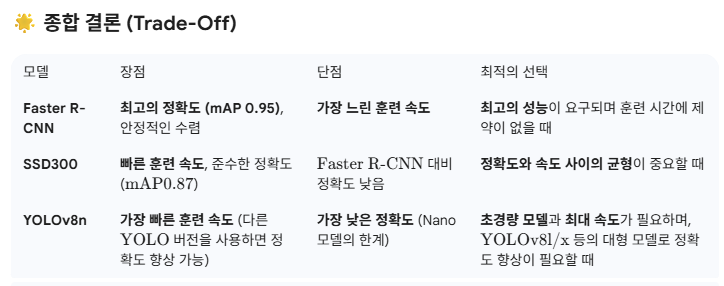